# lets try to fix some persistant eddy problem
near eachother so HOPEFULLY this is straightforward 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [46]:
grid = xr.open_dataset('/data1/bbeutel/LO_output/grid/grid.nc')

(50.0, 400.0)

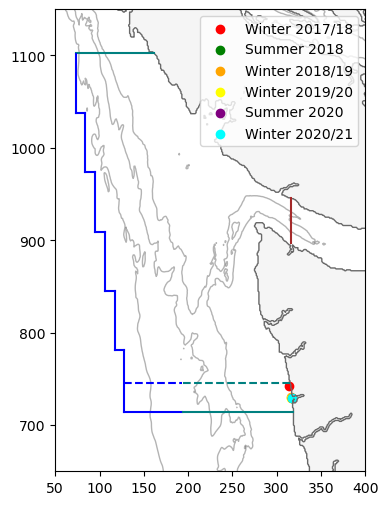

In [4]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the eddy problem spots
ax.scatter([314],[742],c='r', label='Winter 2017/18')
ax.scatter([317],[729],c='g', label='Summer 2018')
ax.scatter([316],[730],c='orange', label='Winter 2018/19')
ax.scatter([316],[729],c='yellow', label='Winter 2019/20')
ax.scatter([317],[729],c='purple', label='Summer 2020')
ax.scatter([317],[729],c='cyan', label='Winter 2020/21')
ax.legend()

# and the new boundaries
plt.plot([316,316], [897,946], c='brown')
plt.plot([ 73,162],[1103,1103], c='teal')
plt.plot([128,193],[ 714, 714], c='b')
plt.plot([117,128],[ 781, 781], c='b')
plt.plot([106,117],[ 845, 845], c='b')
plt.plot([ 95,106],[ 909, 909], c='b')
plt.plot([ 84, 95],[ 974, 974], c='b')
plt.plot([ 73, 84],[1038,1038], c='b')
plt.plot([ 73, 73],[1038,1102], c='b')
plt.plot([ 84, 84],[ 974,1038], c='b')
plt.plot([ 95, 95],[ 909, 974], c='b')
plt.plot([106,106],[ 845, 909], c='b')
plt.plot([117,117],[ 781, 845], c='b')
plt.plot([128,128],[ 714, 781], c='b')
plt.plot([194,319],[ 714, 714], c='teal')

# slit movement of the southern boundary
plt.plot([194,319],[ 745, 745], c='teal', ls='dashed')
plt.plot([128,193],[ 745, 745], c='b', ls='dashed')
# hopefully this TEMPORARY fix works!

ax.set_ylim([650,1150])
ax.set_xlim([50,400])

(310.0, 340.0)

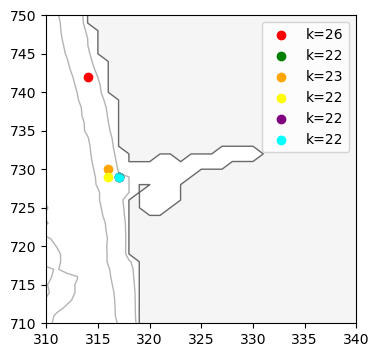

In [5]:
# grid = xr.open_dataset('/data1/bbeutel/LO_output/grid/grid.nc')
fig, ax = plt.subplots(1,1,figsize=(4, 4))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)

# the eddy problem spots
ax.scatter([314],[742],c='r', label='k=26')
ax.scatter([317],[729],c='g', label='k=22')
ax.scatter([316],[730],c='orange', label='k=23')
ax.scatter([316],[729],c='yellow', label='k=22')
ax.scatter([317],[729],c='purple', label='k=22')
ax.scatter([317],[729],c='cyan', label='k=22')

ax.legend()

ax.set_ylim([710,750])
ax.set_xlim([310,340])

In [5]:
print(grid.mask_u[729,317])
print(grid.mask_v[729,317])
print(grid.mask_rho[729,317])
# all agree that its water

<xarray.DataArray 'mask_u' ()>
array(1.)
<xarray.DataArray 'mask_v' ()>
array(1.)
<xarray.DataArray 'mask_rho' ()>
array(1.)


### Lets check the velocities on a specific day
##### Winter 2018/19

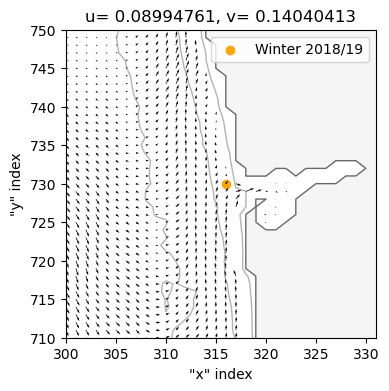

In [49]:
# failed on 2018.09.27/ocean_his_0021.nc, with 66 days left in the run :(
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2018.09.27/ocean_his_0021.nc")

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=23

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([710,750])
ax.set_xlim([300,331])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

#point with error
ax.scatter([316],[730],c='orange', label='Winter 2018/19')
ax.legend(loc="upper right")
ax.set_title('u= '+str(data.u[0,k,730,316].values)+', v= '+str(data.v[0,k,730,316].values))

# QUIVER! 
ax.quiver(X[710:751,300:332],Y[710:751,300:332],data.u[0,k,710:751,300:332],data.v[0,k,710:751,300:332])

In [5]:
# # failed on 2018.09.27/ocean_his_0021.nc, with 66 days left in the run :(
# data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2018.09.27/ocean_his_0021.nc")

# X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
# k=26

# # Make plot area

# fig, ax = plt.subplots(1,1,figsize=(4,4))

#     # Overlay domain landmask and coastline
# ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
# ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
# ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
# ax.set_ylim([710,750])
# ax.set_xlim([300,331])
# ax.set_ylabel('"y" index')
# ax.set_xlabel('"x" index')

# #point with error
# ax.scatter([314],[742],c='r', label='Winter 2017/18')
# ax.legend(loc="upper right")

# # QUIVER! 
# ax.quiver(X[710:751,300:332],Y[710:751,300:332],data.u[0,k,710:751,300:332],data.v[0,k,710:751,300:332])

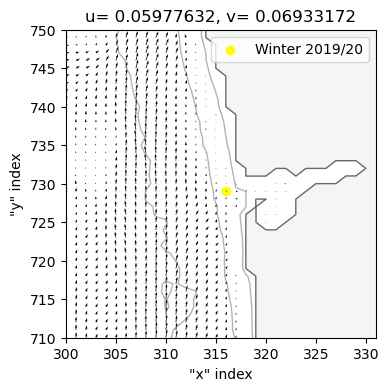

In [47]:
# failed on 2019.12.09/ocean_his_0017.nc
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2019.12.09/ocean_his_0017.nc")

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=22

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([710,750])
ax.set_xlim([300,331])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

#point with error
ax.scatter([316],[729],c='yellow', label='Winter 2019/20')
ax.legend(loc="upper right")
ax.set_title('u= '+str(data.u[0,k,729,316].values)+', v= '+str(data.v[0,k,729,316].values))

# QUIVER! 
ax.quiver(X[710:751,300:332],Y[710:751,300:332],data.u[0,k,710:751,300:332],data.v[0,k,710:751,300:332])

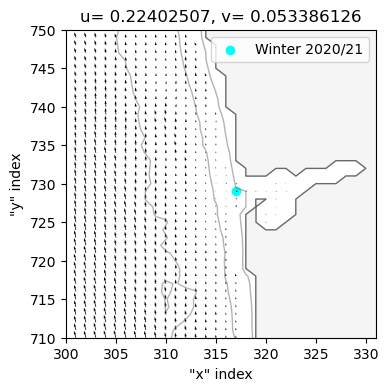

In [48]:
# failed on 2020.12.13/ocean_his_0018
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2020.12.13/ocean_his_0018.nc")

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=22

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([710,750])
ax.set_xlim([300,331])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

#point with error
ax.scatter([317],[729],c='cyan', label='Winter 2020/21')
ax.legend(loc="upper right")
ax.set_title('u= '+str(data.u[0,k,729,317].values)+', v= '+str(data.v[0,k,729,317].values))

# QUIVER! 
ax.quiver(X[710:751,300:332],Y[710:751,300:332],data.u[0,k,710:751,300:332],data.v[0,k,710:751,300:332])

## lets zoom in a bit more and see if the un-gridded u and v tell us anything 

In [22]:
def eddy_quiver(i,j,k,data,color,date):
    
    # Make plot area
    fig, ax = plt.subplots(1,3,figsize=(12,4))
    xmin, xmax = 313,330
    ymin, ymax = 722,735

    for axs in ax:
        axs.set_ylim([ymin,ymax])
        axs.set_xlim([xmin,xmax])
        axs.set_ylabel('"y" index')
        axs.set_xlabel('"x" index')
        #point with error
        axs.scatter([i],[j],c=color, label=date)
        axs.legend(loc="upper right")

    ax[0].set_title('k='+str(k))
    ###########
    # first u #
    ###########
    X, Y = np.meshgrid(grid.xi_u+0.5,grid.eta_u)
    # Overlay domain landmask and coastline
    ax[0].contourf(X, Y, grid.mask_u, levels=[-0.01, 0.01], colors='whitesmoke',zorder=1)
    ax[0].contour(X, Y, grid.mask_u, linewidths=1, levels=[-0.01, 0.01], colors='dimgray',zorder=2)
    # QUIVER! 
    ax[0].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],data.u[0,k,ymin:ymax,xmin:xmax],np.zeros(np.shape(data.u[0,k,ymin:ymax,xmin:xmax])),scale=3,zorder=3)

    #########
    # now v #
    #########
    X, Y = np.meshgrid(grid.xi_v,grid.eta_v+0.5)
    # Overlay domain landmask and coastline
    ax[0].contour(X, Y, grid.mask_v, linewidths=1, levels=[-0.01, 0.01], colors='r',alpha=0.3,zorder=2)
    # QUIVER! 
    ax[0].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],np.zeros(np.shape(data.v[0,k,ymin:ymax,xmin:xmax])),data.v[0,k,ymin:ymax,xmin:xmax],scale=3,color='r',zorder=3)


    ax[1].set_title('k+1')
    ###########
    # first u #
    ###########
    k=k+1
    X, Y = np.meshgrid(grid.xi_u+0.5,grid.eta_u)
    # Overlay domain landmask and coastline
    ax[1].contourf(X, Y, grid.mask_u, levels=[-0.01, 0.01], colors='whitesmoke',zorder=1)
    ax[1].contour(X, Y, grid.mask_u, linewidths=1, levels=[-0.01, 0.01], colors='dimgray',zorder=2)
    # QUIVER! 
    ax[1].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],data.u[0,k,ymin:ymax,xmin:xmax],np.zeros(np.shape(data.u[0,k,ymin:ymax,xmin:xmax])),scale=3,zorder=3)

    #########
    # now v #
    #########
    X, Y = np.meshgrid(grid.xi_v,grid.eta_v+0.5)
    # Overlay domain landmask and coastline
    ax[1].contour(X, Y, grid.mask_v, linewidths=1, levels=[-0.01, 0.01], colors='r',alpha=0.3,zorder=2)
    # QUIVER! 
    ax[1].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],np.zeros(np.shape(data.v[0,k,ymin:ymax,xmin:xmax])),data.v[0,k,ymin:ymax,xmin:xmax],scale=3,color='r',zorder=3)

    ax[2].set_title('k-1')
    ###########
    # first u #
    ###########
    k=k-2
    X, Y = np.meshgrid(grid.xi_u+0.5,grid.eta_u)
    # Overlay domain landmask and coastline
    ax[2].contourf(X, Y, grid.mask_u, levels=[-0.01, 0.01], colors='whitesmoke',zorder=1)
    ax[2].contour(X, Y, grid.mask_u, linewidths=1, levels=[-0.01, 0.01], colors='dimgray',zorder=2)
    # QUIVER! 
    ax[2].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],data.u[0,k,ymin:ymax,xmin:xmax],np.zeros(np.shape(data.u[0,k,ymin:ymax,xmin:xmax])),scale=3,zorder=3)

    #########
    # now v #
    #########
    X, Y = np.meshgrid(grid.xi_v,grid.eta_v+0.5)
    # Overlay domain landmask and coastline
    ax[2].contour(X, Y, grid.mask_v, linewidths=1, levels=[-0.01, 0.01], colors='r',alpha=0.3,zorder=2)
    # QUIVER! 
    ax[2].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],np.zeros(np.shape(data.v[0,k,ymin:ymax,xmin:xmax])),data.v[0,k,ymin:ymax,xmin:xmax],scale=3,color='r',zorder=3)

    plt.tight_layout()

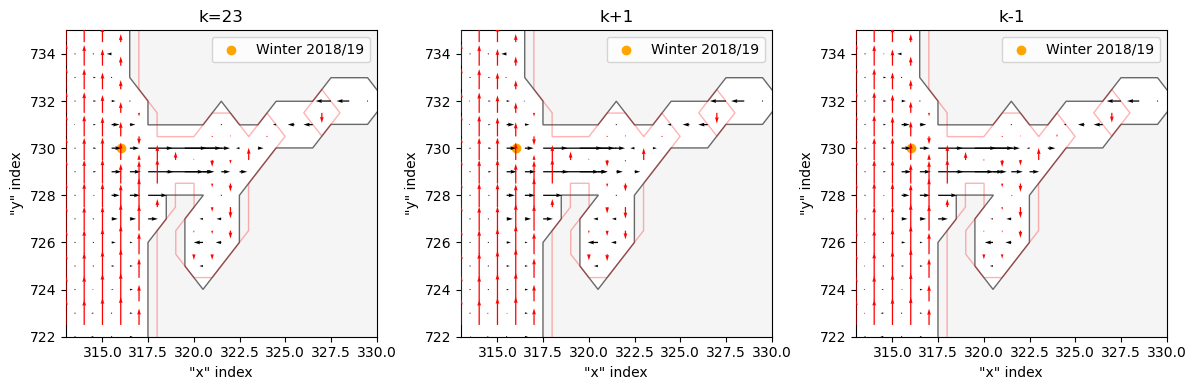

In [23]:
# failed on 2018.09.27/ocean_his_0021.nc, with 66 days left in the run :(
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2018.09.27/ocean_his_0021.nc")

i, j = 316, 730
k=23
eddy_quiver(i,j,k,data,'orange','Winter 2018/19')

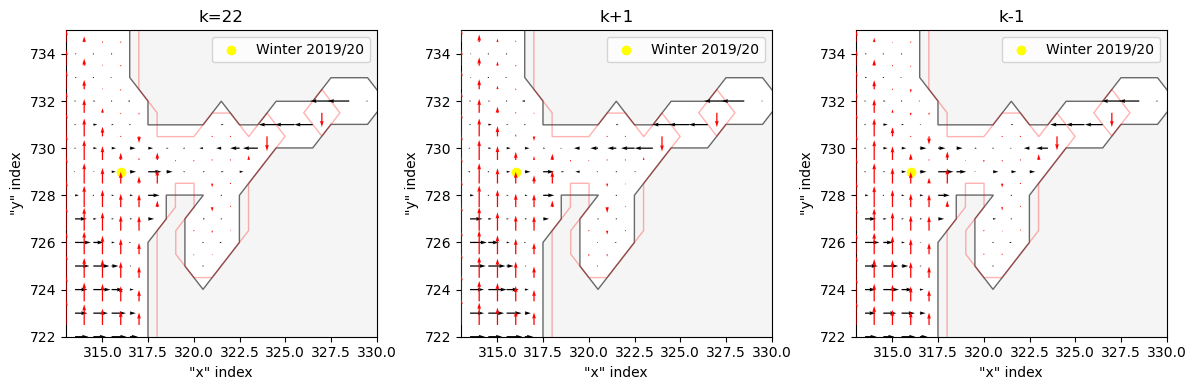

In [24]:
# failed on 2019.12.09/ocean_his_0017.nc
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2019.12.09/ocean_his_0017.nc")

i, j = 316, 729
k=22
eddy_quiver(i,j,k,data,'yellow','Winter 2019/20')

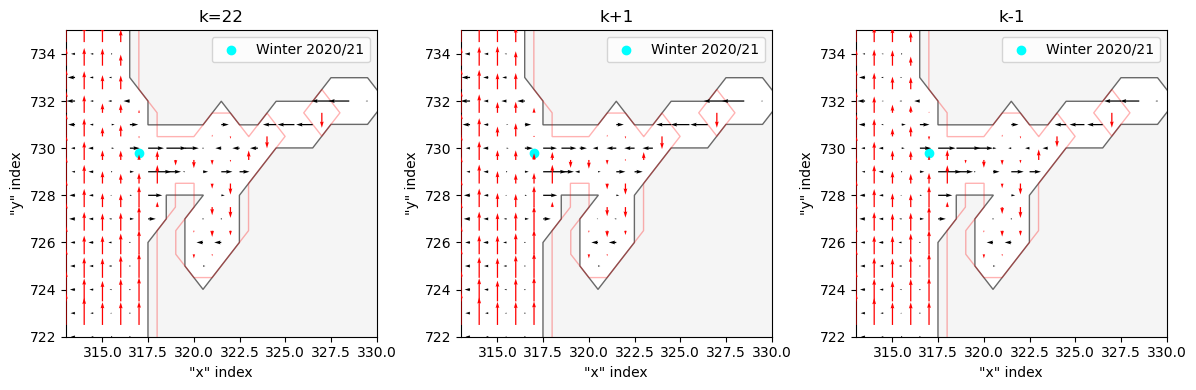

In [25]:
# failed on 2020.12.13/ocean_his_0018
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2020.12.13/ocean_his_0018.nc")

i, j = 316.99, 729.81
k=22
eddy_quiver(i,j,k,data,'cyan','Winter 2020/21')

In [15]:
# why is the most negative value so much smaller than the values printed in babypoo?
np.nanmin(data.v[0,k,722:735,314:330].values)

-0.14469437

### a more comprehensive compare to another river mouth that is not giving an error

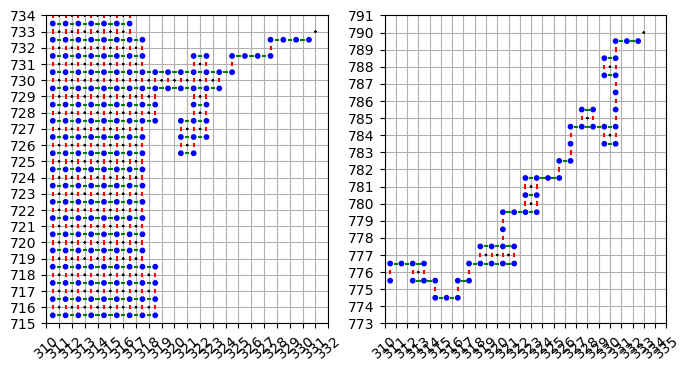

In [29]:
# can i make the grid for me so that i dont have to draw..

fig, ax = plt.subplots(1,2,figsize=(8,4))
#for willipa
xmin, xmax = 310,332
ymin, ymax = 715,734

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)

ax[0].scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax[0].scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax[0].scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax[0].scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)

ax[0].set_xlim([xmin,xmax])
ax[0].set_ylim([ymin,ymax])
ax[0].set_xticks(x)
ax[0].set_xticklabels(x,rotation=40)
ax[0].set_yticks(y)
ax[0].grid()


# for 1 north
xmin, xmax = 310,335
ymin, ymax = 773,791

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)

ax[1].scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax[1].scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2)
ax[1].scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax[1].scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)

ax[1].set_xlim([xmin,xmax])
ax[1].set_ylim([ymin,ymax])
ax[1].set_xticks(x)
ax[1].set_xticklabels(x,rotation=40)
ax[1].set_yticks(y)
ax[1].grid()

In [9]:
# mayhaps the problem is with how I "fixed" the flow at the head of the river, go back and edit how you did that..
# basically you do not need to change the vmask at the head of the rivers, need to change the umask of the step before

In [78]:
grid = xr.open_dataset('/data1/bbeutel/LO_output/grid/grid.nc')

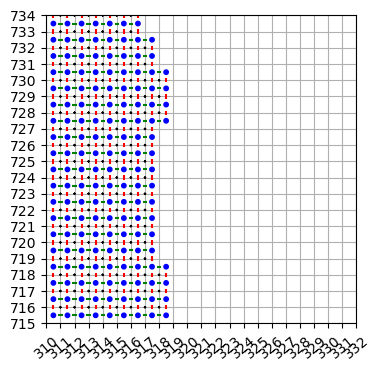

In [81]:
# lets just try out what would happen if i filled in willapa bay?
gridFill = grid

willapa = [[729,319],[730,319],[729,320],[730,320],[729,321],[730,321],[729,322],[730,322],[729,323],[730,323],
           [725,321],[726,321],[727,321],[728,321],[731,321],
           [725,320],[726,320],[727,320],
           [726,322],[727,322],[728,322],[731,322],
           [730,324],[731,324],[731,325],[731,326],[731,327],
           [732,327],[732,328],[732,329],[732,330]]

for w in willapa:
    gridFill.mask_rho[w[0],w[1]] = 0
    gridFill.mask_psi[w[0],w[1]] = 0
    gridFill.mask_u[w[0],w[1]] = 0
    gridFill.mask_v[w[0],w[1]] = 0

# a couple extra u and psi need to be masked
gridFill.mask_psi[729,318]=0
gridFill.mask_u[730,318],gridFill.mask_u[729,318] = 0,0

fig, ax = plt.subplots(1,1,figsize=(4,4))
#for willipa
xmin, xmax = 310,332
ymin, ymax = 715,734

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)

ax.scatter(X+0.5,Y+0.5,gridFill.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax.scatter(X+1,Y+1,gridFill.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax.scatter(X+1,Y+0.5,gridFill.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax.scatter(X+0.5,Y+1,gridFill.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)

ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xticks(x)
ax.set_xticklabels(x,rotation=40)
ax.set_yticks(y)
ax.grid()

In [84]:
# and save
gridFill.to_netcdf('/data1/bbeutel/LO_output/grid/gridFill.nc')

In [83]:
gridFill

<xarray.Dataset>
Dimensions:      (eta_psi: 1301, eta_psi_ex: 1303, eta_rho: 1302, eta_u: 1302, eta_v: 1301, xi_psi: 662, xi_psi_ex: 664, xi_rho: 663, xi_u: 662, xi_v: 663)
Dimensions without coordinates: eta_psi, eta_psi_ex, eta_rho, eta_u, eta_v, xi_psi, xi_psi_ex, xi_rho, xi_u, xi_v
Data variables:
    lat_rho      (eta_rho, xi_rho) float64 ...
    lon_rho      (eta_rho, xi_rho) float64 ...
    mask_rho     (eta_rho, xi_rho) float64 ...
    lat_u        (eta_u, xi_u) float64 ...
    lon_u        (eta_u, xi_u) float64 ...
    mask_u       (eta_u, xi_u) float64 ...
    lat_v        (eta_v, xi_v) float64 ...
    lon_v        (eta_v, xi_v) float64 ...
    mask_v       (eta_v, xi_v) float64 ...
    lat_psi      (eta_psi, xi_psi) float64 ...
    lon_psi      (eta_psi, xi_psi) float64 ...
    mask_psi     (eta_psi, xi_psi) float64 ...
    lat_psi_ex   (eta_psi_ex, xi_psi_ex) float64 ...
    lon_psi_ex   (eta_psi_ex, xi_psi_ex) float64 ...
    mask_psi_ex  (eta_psi_ex, xi_psi_ex) float64 ...
    h            (eta_rho, xi_rho) float64 ...
    f            (eta_rho, xi_rho) float64 ...
    pm           (eta_rho, xi_rho) float64 ...
    pn           (eta_rho, xi_rho) float64 ...
    xl           float64 ...
    el           float64 ...
    spherical    |S1 ...